<h1 align="center">Image Display</h1>

用于显示图像的原生SimpleITK方法是使用外部查看程序。 在笔记本环境中，使用matplotlib显示内嵌图像很方便，如果需要，我们可以实现一些相当丰富的内联图形用户界面，结合来自ipywidgets包和基于matplotlib的显示的控件组件。

在这款笔记本中，我们介绍了使用外部程序和matplotlib来查看图像。 我们还实例化了一个更复杂的内联界面，它使用ipywidgets来控制显示。 对于许多笔记本中使用的后一种中等复杂的显示器，请查看[gui.py](gui.py)文件。

In [2]:
from __future__ import print_function

import SimpleITK as sitk

%matplotlib notebook
import matplotlib.pyplot as plt
import gui

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

## Image Display with An External Viewer

SimpleITK提供了两个用于调用外部查看器，使用过程接口或面向对象的接口的选项。

### Procedural interface
SimpleITK提供了内置的``Show``方法。 此函数将图像写入磁盘，然后启动程序以进行可视化。 默认情况下，它配置为使用Fiji程序，因为它可以快速支持许多医学图像格式和加载。 但是，``Show``可视化程序可以通过环境变量轻松定制：

<ul>
<li>SITK_SHOW_COMMAND: Viewer to use (<a href="http://www.itksnap.org">ITK-SNAP</a>, <a href="http://www.slicer.org">3D Slicer</a>...) </li>
<li>SITK_SHOW_COLOR_COMMAND: 显示彩色图像时使用的查看器.</li>
<li>SITK_SHOW_3D_COMMAND: 用于3D图像的查看器.</li>
</ul>

通常，Show命令接受三个参数：
（1）要显示的图像; 
（2）窗口标题; 
（3）boolean指定是否打印调用的命令和其他调试信息。

In [3]:
mr_image = sitk.ReadImage(fdata('training_001_mr_T1.mha'))

Fetching training_001_mr_T1.mha


In [4]:
sitk.Show?

In [ ]:
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

通过设置环境变量来使用不同的查看器。 使用“magic”功能从您的Jupyter笔记本中执行此操作，或使用您的操作系统特定约定以更永久的方式设置。

In [ ]:
%env SITK_SHOW_COMMAND E:\Program Files\ITK-SNAP\bin\ITK-SNAP.exe

try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ITK-SNAP not installed or ' +
          'environment variable pointing to non existant viewer).')

env: SITK_SHOW_COMMAND=E:\Program Files\ITK-SNAP\bin\ITK-SNAP.exe


In [ ]:
%env SITK_SHOW_COMMAND '/Applications/ImageJ/ImageJ.app/Contents/MacOS/JavaApplicationStub'
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

In [ ]:
%env SITK_SHOW_COMMAND '/Applications/Slicer.app/Contents/MacOS/Slicer'
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (Slicer not installed or ' +
          'environment variable pointing to non existant viewer).')

### Object Oriented interface

[Image Viewer](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageViewer.html)类通过设置各种实例变量值，提供了一种更标准的方法来控制图像查看。 此外，它还可确保记录所有查看设置，因为它们是代码的一部分，而不是外部环境变量。

需要注意的是，如果您设置了各种环境变量来控制SimpleITK设置，则图像查看器将使用这些设置作为默认设置，而不是标准默认值（斐济作为查看器等）。

In [ ]:
# Which external viewer will the image_viewer use if we don't specify the external viewing application? 
# (see caveat above)
image_viewer = sitk.ImageViewer()
image_viewer.SetApplication('/Applications/Fiji.app/Contents/MacOS/ImageJ-macosx')
image_viewer.SetTitle('MR image')

# Use the default image viewer.
image_viewer.Execute(mr_image)

# Change viewer, and display again.
image_viewer.SetApplication('/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP')
image_viewer.Execute(mr_image)

# Change the viewer command, (use ITK-SNAP -z option to open the image in zoomed mode)
image_viewer.SetCommand('/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP -z 3')
image_viewer.Execute(mr_image)

print('Default format for saved file used in display: ' + image_viewer.GetFileExtension())

# Change the file format (possibly to make it compatible with your viewer of choice)
image_viewer.SetFileExtension('.nrrd')
image_viewer.Execute(mr_image)

## Inline display with matplotlib

Fetching training_001_mr_T1.mha


<IPython.core.display.Javascript object>


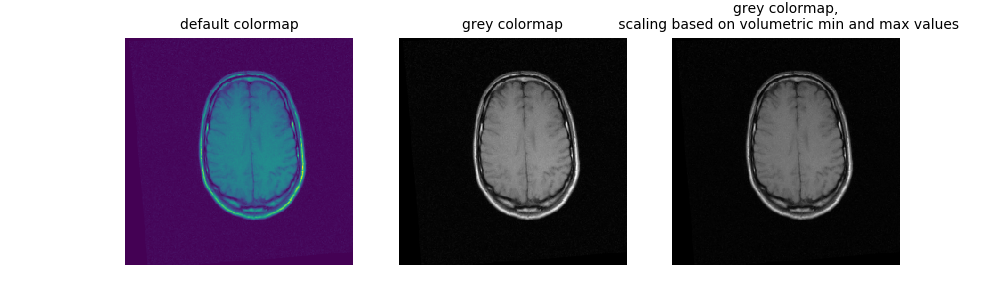

In [7]:
mr_image = sitk.ReadImage(fdata('training_001_mr_T1.mha'))
npa = sitk.GetArrayViewFromImage(mr_image)

# Display the image slice from the middle of the stack, z axis
#获取中间depth的slice
z = int(mr_image.GetDepth()/2)
npa_zslice = npa[z,:,:]

# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)
plt.title('default colormap', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r);
plt.title('grey colormap', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values', fontsize=10)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis('off');

<IPython.core.display.Javascript object>


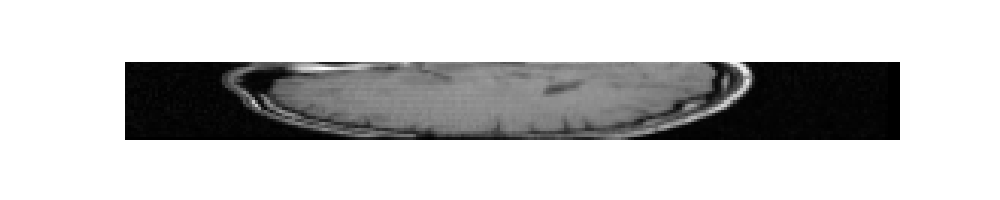

Image spacing: (1.25, 1.25, 4.0)


In [9]:
# Display the image slice in the middle of the stack, x axis
#获取中间width的slice: npa_xslice   
x = int(mr_image.GetWidth()/2)
npa_xslice = npa[:,:,x]

plt.figure(figsize=(10,2))
plt.imshow(npa_xslice, cmap=plt.cm.Greys_r)
plt.axis('off')

print('Image spacing: {0}'.format(mr_image.GetSpacing()))

(256, 26)
(1.25, 4.0)


<IPython.core.display.Javascript object>


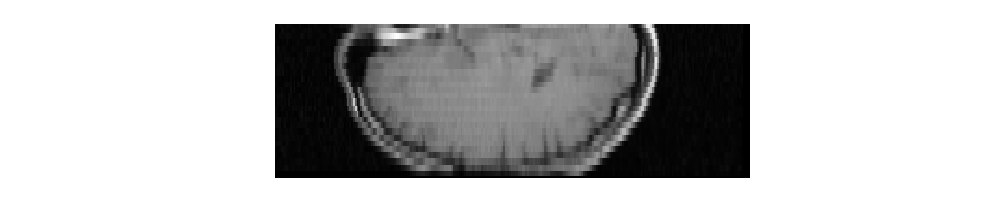

Image spacing: (1.25, 1.25)


In [13]:
# Collapse along the x axis
extractSliceFilter = sitk.ExtractImageFilter()     
size = list(mr_image.GetSize())
size[0] = 0
extractSliceFilter.SetSize( size )
         
index = (x, 0, 0)
extractSliceFilter.SetIndex(index)
sitk_xslice = extractSliceFilter.Execute(mr_image)

# Resample slice to isotropic
original_spacing = sitk_xslice.GetSpacing()

#height,depth
original_size = sitk_xslice.GetSize()
print(original_size)

#(1.25,4.0)
origin_spacing=sitk_xslice.GetSpacing()
print(original_spacing)

min_spacing = min(original_spacing)
new_spacing = [min_spacing, min_spacing]
new_size = [int(round(original_size[0]*(original_spacing[0]/min_spacing))), 
            int(round(original_size[1]*(original_spacing[1]/min_spacing)))]

resampleSliceFilter = sitk.ResampleImageFilter()

# Why is the image pixelated?
sitk_isotropic_xslice = resampleSliceFilter.Execute(sitk_xslice, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, sitk_xslice.GetOrigin(),
                                                    new_spacing, sitk_xslice.GetDirection(), 0, sitk_xslice.GetPixelID())
plt.figure(figsize=(10,2))
plt.imshow(sitk.GetArrayViewFromImage(sitk_isotropic_xslice), cmap=plt.cm.Greys_r)
plt.axis('off')
print('Image spacing: {0}'.format(sitk_isotropic_xslice.GetSpacing()))

## Inline display with matplotlib and ipywidgets

并排显示两个volume，使用滑块控制显示的切片。 左下方的菜单允许返回原始视图，在视图之间前后移动，平移，缩放和保存视图。

可以在[gui.py](gui.py)文件中找到组合matplotlib显示和ipywidgets的各种接口。


In [14]:
ct_image = sitk.ReadImage(fdata('training_001_ct.mha'))
ct_window_level = [720,80]
mr_window_level = [790,395]

Fetching training_001_ct.mha


<IPython.core.display.Javascript object>


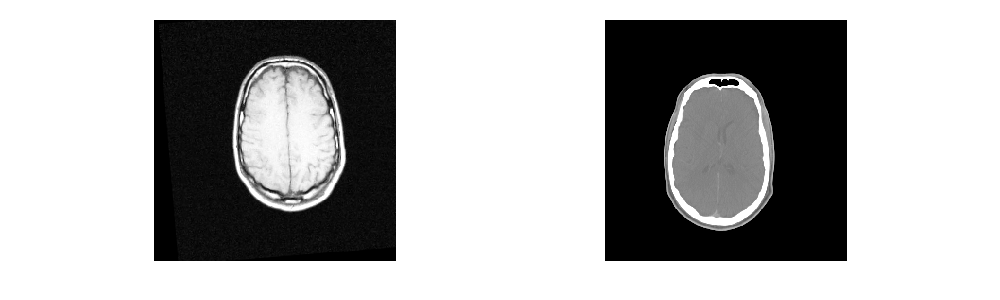

In [16]:
gui.MultiImageDisplay([mr_image, ct_image], figure_size=(10,3), window_level_list=[mr_window_level,ct_window_level]);